In [1]:
import sys

import pandas as pd

sys.path.append('../')
from lib.functions import *
import sklearn.metrics as sm

from sklearn.neighbors import NearestNeighbors

# Network Attacked/Not Attacked by node

## Kmeans

In [46]:
directory="../cooja3-16nodes/"
df = pd.read_csv(directory+"stats_corrected2.csv")

corr=df["type_corrected"].values
correction=[]



features_to_drop=[
        "label",
    # "mean",
        "var",
        # "std",
       #  "packet loss",
       #  "outliers",
       #  "hop",
    "count",
        "node",
    "type",
    "type_corrected",
    "type_corrected_2"
        
       
    ]
for i in range(len(corr)):
    if(i=="normal"):
        correction.append(0)
    else: 
        correction.append(1)
data = df.drop(features_to_drop, axis=1)

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)

labels = accuracy_score_corrected(correction, labels)

accuracy=sm.accuracy_score(correction,labels)
confusion_matrix=sm.confusion_matrix(correction, labels)
print(accuracy)
print(confusion_matrix)
kmeans=df

predicted=[]
for i in range(len(labels)):
    if(labels[i]==0):
        predicted.append("normal")
    else:
        predicted.append("abnormal")
kmeans["predicted"]=predicted
kmeans[kmeans["predicted"]=="normal"]

0.6586538461538461
[[  0   0]
 [ 71 137]]


,label,type,type_corrected,type_corrected_2,packet loss,node,count,std,mean,var,hop,outliers,predicted
43,grid_1gh50-7_2019-02-19_22:53_,BH,normal,normal,19,aaaa::212:7408:8:808,81,724.230784,455.518518,5.245102e+05,2,3,normal
55,grid_normal_2019-02-26_10:53_,normal,normal,normal,23,aaaa::212:740a:a:a0a,77,336.054866,789.090909,1.129329e+05,4,3,normal
71,grid_1gh50-7_2019-02-19_22:53_,BH,normal,normal,26,aaaa::212:740e:e:e0e,74,632.767288,784.432432,4.003944e+05,5,5,normal
81,grid_normal_2019-02-26_11:48_,normal,normal,normal,28,aaaa::212:7405:5:505,72,532.433134,642.736111,2.834850e+05,2,4,normal
84,grid_1gh50-7_2019-02-19_22:53_,BH,normal,normal,29,aaaa::212:740a:a:a0a,71,553.070784,629.366197,3.058873e+05,4,4,normal
87,grid_normal_2019-02-26_11:10_,normal,normal,normal,29,aaaa::212:740c:c:c0c,71,365.473951,685.929578,1.335712e+05,3,7,normal
98,grid_normal_2019-02-26_10:29_,normal,normal,normal,32,aaaa::212:740e:e:e0e,68,914.987522,1230.882353,8.372022e+05,5,3,normal
99,grid_normal_2019-02-26_10:53_,normal,normal,normal,32,aaaa::212:740f:f:f0f,68,369.397733,794.823529,1.364547e+05,4,3,normal
102,grid_1gh30-7_2019-02-19_22:35_,BH,normal,normal,33,aaaa::212:7404:4:404,67,745.498120,453.497015,5.557674e+05,1,3,normal
104,grid_normal_2019-02-19_21:23_,normal,normal,normal,33,aaaa::212:740c:c:c0c,67,427.816842,639.149254,1.830273e+05,5,4,normal


We have 0.90  (90%) of accuracy in detecting if the node is part affected by a malicious one

Understanding the distribution

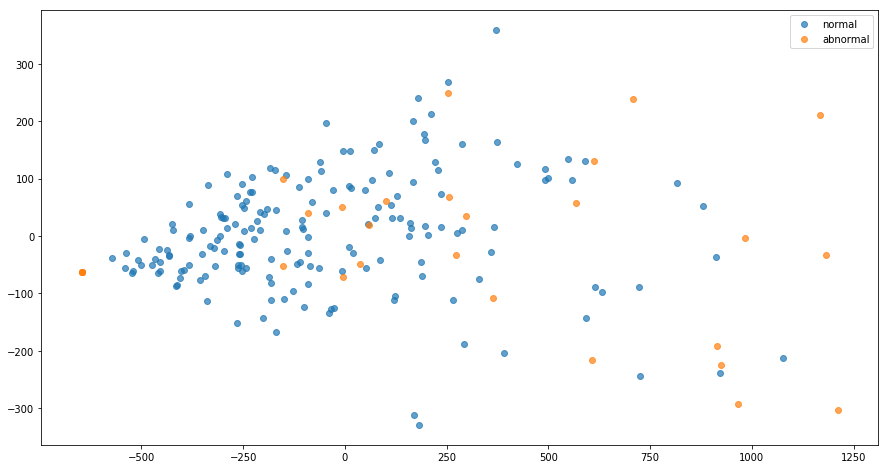

In [47]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = df['type_corrected']
dfPCA.head()

labels = df['type_corrected'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()


In [48]:

results=pd.DataFrame()
#####KNN
n_estimators=100
test_size=0.3
n_neighbors=3
# separate features from target values
features = df.drop(columns=features_to_drop).drop(columns="predicted")

target = df['type_corrected'].values
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=1)
knn = KNeighborsClassifier(n_neighbors=n_neighbors) 
#t0 = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results = pd.concat([results,pd.DataFrame({'Model': ['KNN'], 
                                               'Window Size': ["100"],
                                               'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
                                               'Precision': [metrics.precision_score(y_test, y_pred, average='macro')],
                                               'Recall': [metrics.recall_score(y_test, y_pred, average='macro')], 
                                               'F1-score': [metrics.f1_score(y_test, y_pred, average='macro')],
                                               #'Time (ms)': [time.time() - t0]
                                              })])
results

,Model,Window Size,Accuracy,Precision,Recall,F1-score
0,KNN,100,0.84127,0.688596,0.621698,0.642045


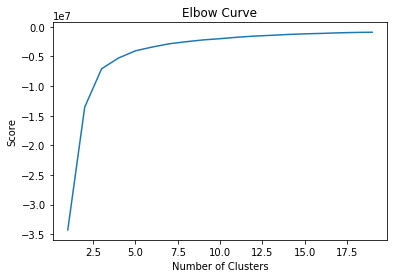

In [50]:
Y=data
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans


score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

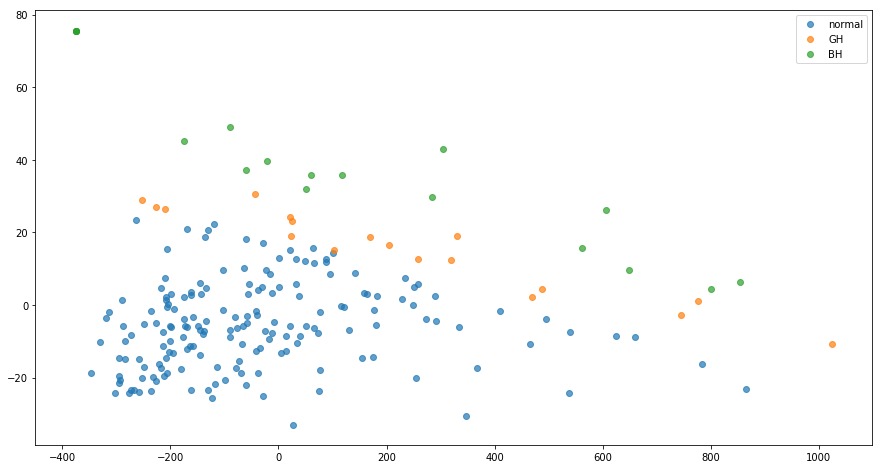

In [29]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = df['type_corrected_2']
dfPCA.head()

labels = df['type_corrected_2'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()


In [51]:

results=pd.DataFrame()
#####KNN
n_estimators=100
test_size=0.3
n_neighbors=3
# separate features from target values
features = df.drop(columns=features_to_drop).drop(columns="predicted")

target = df['type_corrected_2'].values
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=1)
knn = KNeighborsClassifier(n_neighbors=n_neighbors) 
#t0 = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results = pd.concat([results,pd.DataFrame({'Model': ['KNN'], 
                                               'Window Size': ["100"],
                                               'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
                                               'Precision': [metrics.precision_score(y_test, y_pred, average='macro')],
                                               'Recall': [metrics.recall_score(y_test, y_pred, average='macro')], 
                                               'F1-score': [metrics.f1_score(y_test, y_pred, average='macro')],
                                               #'Time (ms)': [time.time() - t0]
                                              })])
results

/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Model,Window Size,Accuracy,Precision,Recall,F1-score
0,KNN,100,0.825397,0.453216,0.451667,0.448153


In [6]:
df.head()

,label,type,type_corrected,type_corrected_2,packet loss,node,count,std,mean,var,hop,outliers,predicted
0,grid_1bh-9_2019-02-20_00:30_,BH,normal,normal,2,aaaa::212:7403:3:303,98,76.055652,120.888775,5784.462244,1,4,abnormal
1,grid_1gh30-9_2019-02-20_00:12_,BH,normal,normal,3,aaaa::212:7402:2:202,97,102.097756,152.846392,10423.951890,2,3,abnormal
2,grid_1bh-9_2019-02-20_00:30_,BH,normal,normal,4,aaaa::212:7405:5:505,96,109.693608,186.666667,12032.687720,2,6,abnormal
3,grid_1bh-9_2019-02-20_00:30_,BH,normal,normal,4,aaaa::212:740e:e:e0e,96,104.779116,383.322917,10978.663050,5,4,abnormal
4,grid_1bh-9_2019-02-20_00:30_,BH,normal,normal,4,aaaa::212:7407:7:707,96,119.165188,182.072917,14200.342000,2,3,abnormal
